In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

In [2]:
# Load our matrices and drop our index
df = pd.read_csv('x06Simple.csv', header=0)
df.drop(df.columns[0], axis=1, inplace=True)
print(df)

    Age  Temp of Water  Length of Fish
0    14             25             620
1    28             25            1315
2    41             25            2120
3    55             25            2600
4    69             25            3110
5    83             25            3535
6    97             25            3935
7   111             25            4465
8   125             25            4530
9   139             25            4570
10  153             25            4600
11   14             27             625
12   28             27            1215
13   41             27            2110
14   55             27            2805
15   69             27            3255
16   83             27            4015
17   97             27            4315
18  111             27            4495
19  125             27            4535
20  139             27            4600
21  153             27            4600
22   14             29             590
23   28             29            1305
24   41             29   

In [3]:
# convert our dataframe into an nparray
data = df.to_numpy()
print(data)

[[  14   25  620]
 [  28   25 1315]
 [  41   25 2120]
 [  55   25 2600]
 [  69   25 3110]
 [  83   25 3535]
 [  97   25 3935]
 [ 111   25 4465]
 [ 125   25 4530]
 [ 139   25 4570]
 [ 153   25 4600]
 [  14   27  625]
 [  28   27 1215]
 [  41   27 2110]
 [  55   27 2805]
 [  69   27 3255]
 [  83   27 4015]
 [  97   27 4315]
 [ 111   27 4495]
 [ 125   27 4535]
 [ 139   27 4600]
 [ 153   27 4600]
 [  14   29  590]
 [  28   29 1305]
 [  41   29 2140]
 [  55   29 2890]
 [  69   29 3920]
 [  83   29 3920]
 [  97   29 4515]
 [ 111   29 4520]
 [ 125   29 4525]
 [ 139   29 4565]
 [ 153   29 4566]
 [  14   31  590]
 [  28   31 1205]
 [  41   31 1915]
 [  55   31 2140]
 [  69   31 2710]
 [  83   31 3020]
 [  97   31 3030]
 [ 111   31 3040]
 [ 125   31 3180]
 [ 139   31 3257]
 [ 153   31 3214]]


In [4]:
# Split our data into train and test
train, test = train_test_split(data, train_size=0.667, random_state=0)
print("TRAIN:")
print(train)
print("\nTEST:")
print(test)

TRAIN:
[[ 111   27 4495]
 [  69   27 3255]
 [  14   29  590]
 [  83   27 4015]
 [ 111   31 3040]
 [ 125   25 4530]
 [  41   27 2110]
 [  83   25 3535]
 [  97   27 4315]
 [ 153   29 4566]
 [  55   27 2805]
 [  41   31 1915]
 [ 111   25 4465]
 [  28   31 1205]
 [  28   25 1315]
 [  69   29 3920]
 [  28   27 1215]
 [  14   31  590]
 [  41   29 2140]
 [  97   25 3935]
 [  28   29 1305]
 [  55   31 2140]
 [ 153   27 4600]
 [ 125   27 4535]
 [ 139   25 4570]
 [  97   31 3030]
 [ 139   31 3257]
 [  55   25 2600]
 [  14   25  620]]

TEST:
[[ 125   29 4525]
 [  69   31 2710]
 [  83   29 3920]
 [  69   25 3110]
 [ 153   25 4600]
 [  55   29 2890]
 [  97   29 4515]
 [  14   27  625]
 [  83   31 3020]
 [ 139   29 4565]
 [ 111   29 4520]
 [ 139   27 4600]
 [ 125   31 3180]
 [  41   25 2120]
 [ 153   31 3214]]


In [5]:
###
### I created this function not for reuse, but for code isolation..
### Quick n dirty...
### FIXME should probably clean this up
###
def test_set_rmse(test, thetas, train_x_mean, train_x_std):
    total_squared_error = 0
    for row in test:

        # Normalize our test data based on training data
        row_x = row[0:rowlen-1]
        row_x_norm = (row_x-train_x_mean) / train_x_std

        # Dont forget to add the bias!
        row_x_norm = np.append(np.ones(1), row_x_norm)

        # Calculate the distance between the predicted vs actual, and sum them up so we can average at end
        predicted = (row_x_norm @ thetas)
        actual = row[rowlen-1]
        error = actual - predicted
        total_squared_error += error**2

    mse = total_squared_error / test.shape[0]
    rmse = math.sqrt(mse)
    return rmse

In [6]:
###
### Gradient Descent
###

rowlen = train.shape[1]

# Extract the x matrix and standardize
# (with range its i:j+1 and with single value its just j... easy to have an off by 1 error with column extraction)
train_x = train[:, 0:rowlen-1]

# extracted the y column, and convert it back into a single column matrix
train_y = train[:, rowlen-1]
train_y = train_y.reshape(train_y.shape[0], 1)

# Normalize our x training data
train_x_mean = np.mean(train_x, axis=0)
train_x_std = np.std(train_x, axis=0, ddof=1)
train_x_norm = (train_x-train_x_mean) / train_x_std

# Add our bias to the training data
train_x_norm = np.append(np.ones((train.shape[0], 1)), train_x_norm, 1)

# constant learning rate
learning_rate = 0.01

# init thetas at random from -1 to 1
random.seed(a=0)
thetas = np.asarray([random.uniform(-1, 1) for i in range(train_x_norm.shape[1])]).reshape((train.shape[1], 1))

# These are the arrays for pyplot
train_rmses = []
test_rmses = []
iterations = []

# Init our default values
iteration = 0
prev_rmse = 0
rmse_change = 999999

# perform the gradient descent
while iteration < 1000 and rmse_change > 2**-23:

    thetas -= (0.02/train.shape[0]) * train_x_norm.T @ (train_x_norm @ thetas - train_y)

    total_squared_error = 0
    for i, row_x in enumerate(train_x_norm):
        # Calculate the distance between the predicted vs actual, and sum them up so we can average at end
        predicted = (row_x @ thetas)
        actual = train_y[i]
        error = actual - predicted
        total_squared_error += error**2

    # Calculate our rmse
    mse = total_squared_error / train_x_norm.shape[0]
    rmse = math.sqrt(mse)

    # Book-keeping..
    rmse_change = abs(rmse - prev_rmse)
    prev_rmse = rmse
    iteration += 1

    train_rmses.append(rmse)
    test_rmses.append(test_set_rmse(test, thetas, train_x_mean, train_x_std))
    iterations.append(iteration)

print("training data RMSE:")
print(rmse)
print("\ntesting data RMSE:")
print(test_set_rmse(test, thetas, train_x_mean, train_x_std))

training data RMSE:
509.38757083323736

testing data RMSE:
703.6080180379209


In [7]:
# Print out final model
print("FINAL PREDICTION MODEL:")
print("y = " + str(thetas[0][0]), end='')
for i in range(1, len(thetas)):
    print(" + " + str(thetas[i][0]) + "*X" + str(i), end='')
print()

FINAL PREDICTION MODEL:
y = 2917.659361805626 + 1221.3321770365553*X1 + -278.69510452956223*X2


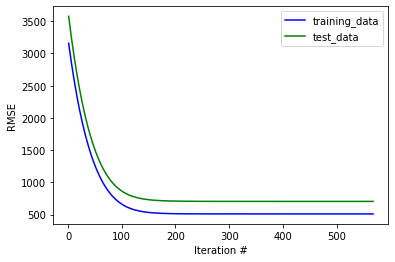

In [8]:
# Finally lets plot our change in RMSE...
plt.plot(iterations, train_rmses, color='blue', label='training_data')
plt.plot(iterations, test_rmses, color='green', label='test_data')
plt.xlabel("Iteration #")
plt.ylabel("RMSE")
plt.legend()
plt.show()